In [1]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd


#visulaization modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)


# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv("stroke_sampling.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,children,0,95.12,18.0,Unknown,0
1,1,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0
2,0,8.0,0,0,0,Private,1,110.89,17.6,Unknown,0
3,0,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0
4,1,14.0,0,0,0,Never_worked,0,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
9715,0,60.0,0,0,0,Private,1,89.22,37.8,never smoked,1
9716,0,70.0,0,1,1,Private,0,239.07,26.1,never smoked,1
9717,1,82.0,0,0,1,Private,0,86.62,29.5,formerly smoked,1
9718,1,71.0,1,0,1,Self-employed,0,87.80,NaN,Unknown,1


In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,children,0,95.12,18.0,Unknown,0
1,1,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0
2,0,8.0,0,0,0,Private,1,110.89,17.6,Unknown,0
3,0,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0
4,1,14.0,0,0,0,Never_worked,0,161.28,19.1,Unknown,0


In [4]:
df2 = df.copy()

<a id = '2.0'> </a>

In [5]:
df2['smoking_status'].value_counts()

smoking_status
never smoked       3576
Unknown            2392
formerly smoked    2186
smokes             1566
Name: count, dtype: int64

<a id='3.1'>

### Category Data Encoding

In [6]:
df['gender'].value_counts()

gender
0    5626
1    4094
Name: count, dtype: int64

In [7]:
# df=df[(df['gender'] != 'Other')]

In [8]:
df['gender'].value_counts()

gender
0    5626
1    4094
Name: count, dtype: int64

In [9]:
df['work_type'].value_counts()

work_type
Private          5671
Self-employed    2049
Govt_job         1257
children          721
Never_worked       22
Name: count, dtype: int64

In [10]:
df["work_type"]=df["work_type"].str.replace("children","0")
df["work_type"]=df["work_type"].str.replace("Govt_job","1")
df["work_type"]=df["work_type"].str.replace("Never_worked","2")
df["work_type"]=df["work_type"].str.replace("Private","3")
df["work_type"]=df["work_type"].str.replace("Self-employed","4")

df["work_type"]=df["work_type"].astype("int32")

In [11]:
# df["gender"]=df["gender"].str.replace("Male","1")
# df["gender"]=df["gender"].str.replace("Female","0")
# df["gender"]=df["gender"].astype("int32")

In [12]:
df['ever_married'].value_counts()

ever_married
1    7458
0    2262
Name: count, dtype: int64

In [13]:
# df["ever_married"]=df["ever_married"].str.replace("Yes","1")
# df["ever_married"]=df["ever_married"].str.replace("No","0")
# df["ever_married"]=df["ever_married"].astype("int32")

In [14]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,0,0,95.12,18.0,Unknown,0
1,1,58.0,1,0,1,3,1,87.96,39.2,never smoked,0
2,0,8.0,0,0,0,3,1,110.89,17.6,Unknown,0
3,0,70.0,0,0,1,3,0,69.04,35.9,formerly smoked,0
4,1,14.0,0,0,0,2,0,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
9715,0,60.0,0,0,0,3,1,89.22,37.8,never smoked,1
9716,0,70.0,0,1,1,3,0,239.07,26.1,never smoked,1
9717,1,82.0,0,0,1,3,0,86.62,29.5,formerly smoked,1
9718,1,71.0,1,0,1,4,0,87.80,NaN,Unknown,1


In [15]:
# df["Residence_type"]=df["Residence_type"].str.replace("Rural","0")
# df["Residence_type"]=df["Residence_type"].str.replace("Urban","1")
# df["Residence_type"]=df["Residence_type"].astype("int32")

In [16]:
df["smoking_status"]=df["smoking_status"].str.replace("never smoked","0")
df["smoking_status"]=df["smoking_status"].str.replace("formerly smoked","1")
df["smoking_status"]=df["smoking_status"].str.replace("Unknown","2")
df["smoking_status"]=df["smoking_status"].str.replace("smokes","3")
df["smoking_status"]=df["smoking_status"].astype("int32")

In [17]:
df.smoking_status.value_counts()

smoking_status
0    3576
2    2392
1    2186
3    1566
Name: count, dtype: int64

In [18]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  903
smoking_status         0
stroke                 0
dtype: int64

In [19]:
df['bmi'].fillna(df.bmi.median(),inplace=True)

In [20]:
from feature_engine.outliers import Winsorizer

win= Winsorizer(capping_method='iqr',variables=['avg_glucose_level'],tail='both',fold=1.5)

df['avg_glucose_level']=win.fit_transform(df[['avg_glucose_level']])

print(win.left_tail_caps_,win.right_tail_caps_)

{'avg_glucose_level': -22.323750000000004} {'avg_glucose_level': 245.28625}


In [21]:
from feature_engine.outliers import Winsorizer

win= Winsorizer(capping_method='iqr',variables=['bmi'],tail='both',fold=1.5)

df['bmi']=win.fit_transform(df[['bmi']])

print(win.left_tail_caps_,win.right_tail_caps_)

{'bmi': 14.3} {'bmi': 43.89999999999999}


<Axes: >

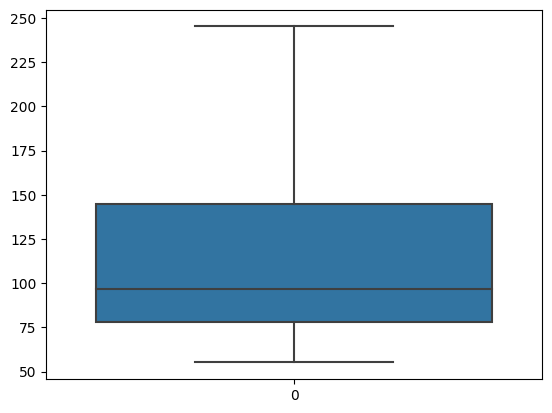

In [22]:
sns.boxplot(df['avg_glucose_level'])

In [23]:
df['stroke'].value_counts()

stroke
0    4860
1    4860
Name: count, dtype: int64

In [42]:
# df.to_csv('stroke_clean.csv',index =False)

In [25]:
X= df.drop('stroke',axis = 1)
y = df['stroke']

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [27]:

# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# decision Tree


DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)



********************
********************
Train accuracy: 1.0
Test accuracy: 0.9732510288065843
********************
[0.97016461 0.97736626 0.97222222 0.97633745 0.97119342]
0.9734567901234568
********************
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       984
           1       0.95      1.00      0.97       960

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944

********************
97.33% Accurate
********************


In [29]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9917695473251029
train accuracy: 1.0
********************
0.9924897119341564
********************
********************
99.18% Accurate


In [30]:

# logistic regression

LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,X,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 0.7577160493827161
train accuracy: 0.7714763374485597
********************
0.7691358024691358
********************
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       984
           1       0.95      1.00      0.97       960

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944

********************
75.77% Accurate


In [31]:
#  XGBoost

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

# prediction
train_prediction= XGB.predict(X_train)
test_prediction= XGB.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(XGB,X,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


XGB_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(XGB_HSC*100,2)}% Accurate")

********************
test accuracy: 0.9686213991769548
train accuracy: 0.9971707818930041
********************
0.9740740740740741
********************
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       984
           1       0.95      1.00      0.97       960

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944

********************
96.86% Accurate


In [32]:
from sklearn.ensemble import AdaBoostClassifier
# random forest

ada=AdaBoostClassifier(random_state=42)
ada.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= ada.predict(X_train)
test_prediction= ada.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(ada,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
ada_h = accuracy_score(test_prediction,y_test)
print(f"{round(ada_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.779835390946502
train accuracy: 0.7944958847736625
********************
0.7967078189300411
********************
********************
77.98% Accurate


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
# random forest

gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
gbc_h = accuracy_score(test_prediction,y_test)
print(f"{round(gbc_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.8559670781893004
train accuracy: 0.8704989711934157
********************
0.855349794238683
********************
********************
85.6% Accurate


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# model
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Test accuracy:',accuracy_score(y_test,test_prediction))
print('Train accuracy:',accuracy_score(y_train,train_prediction))

print('*'*20)
result = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(result)


print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_prediction))


print('*'*20)
# Accuracy score
Knn_SC = accuracy_score(test_prediction,y_test)
print(f"{round(Knn_SC*100,2)}% Accurate")


********************
Test accuracy: 0.9279835390946503
Train accuracy: 0.9498456790123457
********************
Confusion Matrix:
[[844 140]
 [  0 960]]
********************
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       984
           1       0.87      1.00      0.93       960

    accuracy                           0.93      1944
   macro avg       0.94      0.93      0.93      1944
weighted avg       0.94      0.93      0.93      1944

********************
92.8% Accurate


In [35]:
score = [DT_SC,RF_SC,lr_HSC,Knn_SC,XGB_HSC,ada_h,gbc_h]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "Logistic Regression",'Knn','XGBoost','AdaBoost',"GradientBoostingClassifier"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.991770
0,Decision Tree,0.973251
4,XGBoost,0.968621
3,Knn,0.927984
6,GradientBoostingClassifier,0.855967
5,AdaBoost,0.779835
2,Logistic Regression,0.757716


In [45]:
import pickle
#save the model
model = rfc  # Your machine learning model object
file_path = 'rfc_strok.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [36]:
# load the model
import pickle

file_path = 'rfc_strok.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [37]:
X_train
loaded_model.predict([[1,67,0,1,1,3,1,163.865,36.6,1]]) #1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3436,0,80.0,1,0,1,4,1,218.00,33.5,2
8311,1,68.0,0,1,1,3,1,223.83,31.9,1
2776,0,16.0,0,0,0,3,0,81.92,22.7,2
9578,1,42.0,0,0,1,3,0,83.41,25.4,2
9405,0,70.0,0,1,1,3,0,59.35,32.3,1
...,...,...,...,...,...,...,...,...,...,...
2895,1,11.0,0,0,0,0,0,65.07,21.5,0
7813,1,81.0,0,0,1,4,0,91.54,31.4,0
905,0,21.0,0,0,0,3,1,112.07,28.2,0
5192,0,76.0,0,0,0,3,1,89.96,28.7,2


In [38]:
loaded_model.predict([[0,	33.0,	0,	0,	1,	3,	0,	89.820,	27.9,	0.0]])

array([0], dtype=int64)

In [39]:
loaded_model.predict([[1,42.0,0,0,1,3,1,85.000,29.9,2.0]])

array([0], dtype=int64)

In [40]:
loaded_model.predict([[1,67,0,1,1,3,1,163.865,36.6,1]]) #1

array([1], dtype=int64)

In [41]:
loaded_model.predict([[1,49,0,0,0,3,0,104.86,31.9,3]]) #1

array([1], dtype=int64)

<a id = '5'></a>

<a id = '5.1'>
    

<a id = '5.3'>

## Model 3 With Decission Tree

In [ ]:
# Define the parameter grid for the grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_dt = best_dt_classifier.predict(x_test_resampled)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test_resampled, y_pred_dt)
print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_dt))

# ROC curve
roc_auc = roc_auc_score(y_test_resampled, best_dt_classifier.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, best_dt_classifier.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test_resampled, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Non-Stroke', 'Predicted Stroke'])
plt.yticks([0.5, 1.5], ['Actual Non-Stroke', 'Actual Stroke'])
plt.show()

<a id = '5.4'>

## Model 4 With KNN

In [ ]:
# Define the parameter grid for the grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_knn_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_knn = best_knn_classifier.predict(x_test_resampled)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test_resampled, y_pred_knn)
print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_knn))

# ROC curve
roc_auc = roc_auc_score(y_test_resampled, best_knn_classifier.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, best_knn_classifier.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test_resampled, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Non-Stroke', 'Predicted Stroke'])
plt.yticks([0.5, 1.5], ['Actual Non-Stroke', 'Actual Stroke'])
plt.show()

<a id = '5.5'>

### Model 5 Stacking model using (SVM, Decision Tree, Logistic Regression, KNN)

In [ ]:
base_models = [('SVM',SVC()),('Decision Tree',DecisionTreeClassifier()),('Logistic Regerssion',LogisticRegression()) , ('KNN',KNeighborsClassifier(n_neighbors=3))]
stacking = StackingClassifier(
    estimators = base_models , 
    final_estimator = LogisticRegression(),
    cv = 5
)

stacking.fit(x_train_resampled , y_train_resampled)
# Predict on the test set
y_pred_stacking = stacking.predict(x_test_resampled)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test_resampled, y_pred_stacking)
print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_stacking))

# ROC curve
roc_auc = roc_auc_score(y_test_resampled, stacking.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, stacking.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_stacking = confusion_matrix(y_test_resampled, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacking, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Non-Stroke', 'Predicted Stroke'])
plt.yticks([0.5, 1.5], ['Actual Non-Stroke', 'Actual Stroke'])
plt.show()


<a id = '5.6'>

## Model 6 Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
)

grid_search_rf.fit(x_train_resampled, y_train_resampled)

best_params_rf = grid_search_rf.best_params_

best_rf_classifier = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_classifier.fit(x_train_resampled, y_train_resampled)

y_pred_rf = best_rf_classifier.predict(x_test_resampled)

accuracy_rf_train = best_rf_classifier.score(x_train_resampled, y_train_resampled)
accuracy_rf_test = accuracy_score(y_test_resampled, y_pred_rf)
print("Best Hyperparameters for Random Forest:", best_params_rf)
print(f"Accuracy for Random Forest (Train): {accuracy_rf_train:.4f}")
print(f"Accuracy for Random Forest (Test): {accuracy_rf_test:.4f}")

# ROC curve
roc_auc_rf = roc_auc_score(y_test_resampled, best_rf_classifier.predict_proba(x_test_resampled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test_resampled, best_rf_classifier.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_resampled, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest')
plt.xticks([0.5, 1.5], ['Predicted Non-Stroke', 'Predicted Stroke'])
plt.yticks([0.5, 1.5], ['Actual Non-Stroke', 'Actual Stroke'])
plt.show()

# Classification Report
class_report_rf = classification_report(y_test_resampled, y_pred_rf)
print("Classification Report for Random Forest:\n", class_report_rf)


<a id = '6'></a>


   <h2 style="font-size: 35px; font-family: Garamond; font-weight: normal; color: #000080; padding: 
               20px; border-radius: 100px 100px; text-align: center;  background-color: #f6f5f5 ;">
     6. Recommendations📊</h2>
     

### 💡 Suggestions to Reduce the Risk of Stroke

1. **Maintain a Healthy Diet:** 🥗 Eating a balanced diet rich in fruits, vegetables, whole grains, lean proteins, and healthy fats can help control weight and reduce the risk of stroke.

2. **Regular Physical Activity:** 🏃‍♂️ Engaging in regular exercise, such as brisk walking, swimming, or cycling, can improve cardiovascular health and reduce stroke risk.

3. **Monitor Blood Pressure:** 🩺 High blood pressure is a major risk factor for stroke. Regularly check your blood pressure and follow medical advice for managing hypertension.

4. **Manage Cholesterol Levels:** 🌡️ High cholesterol levels can lead to plaque buildup in arteries, increasing stroke risk. Consult a healthcare provider for cholesterol management.

5. **Quit Smoking:** 🚭 Smoking damages blood vessels and raises the risk of blood clots. Quitting smoking is one of the most effective ways to reduce stroke risk.

6. **Limit Alcohol Consumption:** 🍷 Excessive alcohol intake can raise blood pressure and contribute to stroke risk. Consume alcohol in moderation or as recommended by healthcare professionals.

7. **Control Diabetes:** 🩸 If you have diabetes, manage it carefully through medication, diet, and regular monitoring to prevent complications that increase stroke risk.

8. **Maintain a Healthy Weight:** ⚖️ Obesity is linked to a higher risk of stroke. Achieving and maintaining a healthy weight can reduce this risk.

9. **Stay Hydrated:** 💧 Proper hydration is important for overall health, including cardiovascular health. Drink an adequate amount of water daily.

10. **Manage Stress:** 🧘‍♀️ Chronic stress can contribute to high blood pressure and other stroke risk factors. Practice stress-reduction techniques such as meditation or yoga.

<div style="border-radius: 10px; border: #FFB07F solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    🎯 <b>Remember: </b> 
    Reducing stroke risk involves making healthy lifestyle choices and seeking medical guidance when needed. Consult with healthcare professionals for personalized recommendations.
</div>
